In [1]:
# -*- coding: utf 8

from matplotlib import pyplot as plt
from matplotlib import ticker

import pandas as pd
import numpy as np

plt.style.use('seaborn-colorblind')
plt.ion()

In [2]:
#Dados do site: https://brasil.io/dataset/covid19/files/
#Arquivo 'caso_full.csv'
#Data de captura: 2021-02-11
#Dados já filtrados para que contenha apenas informações por estado
#Removidas as colunas 'city' e 'city_ibge_code'

df = pd.read_csv('../../data/covid/casos_estados.csv')
df.head()

,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,2020-02-25,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-25,0.0,0,1,state,SP,1,0
1,2020-02-26,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-26,0.0,0,2,state,SP,0,0
2,2020-02-27,202009,46289333.0,45919049.0,False,False,1,0.00216,2020-02-27,0.0,0,3,state,SP,0,0
3,2020-02-28,202009,46289333.0,45919049.0,False,False,2,0.00432,2020-02-28,0.0,0,4,state,SP,1,0
4,2020-02-29,202009,46289333.0,45919049.0,False,False,2,0.00432,2020-02-29,0.0,0,5,state,SP,0,0


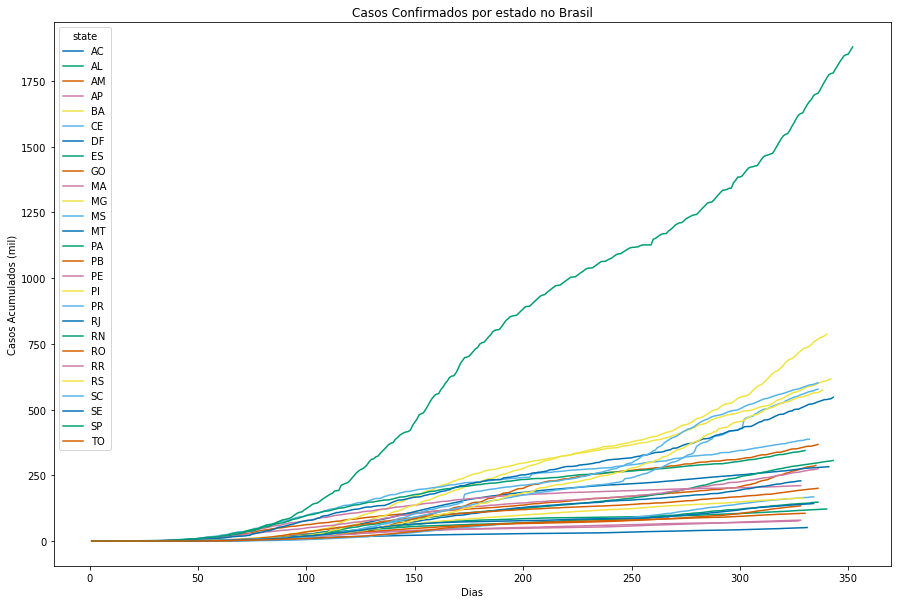

In [3]:
scale_y = 1e3
ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
todos = df.pivot(index="order_for_place", columns='state', values='last_available_confirmed')
todos.plot(figsize=(15,10)).yaxis.set_major_formatter(ticks_y)
plt.title('Casos Confirmados por estado no Brasil')
plt.xlabel('Dias')
plt.ylabel("Casos Acumulados (mil)")
plt.show()

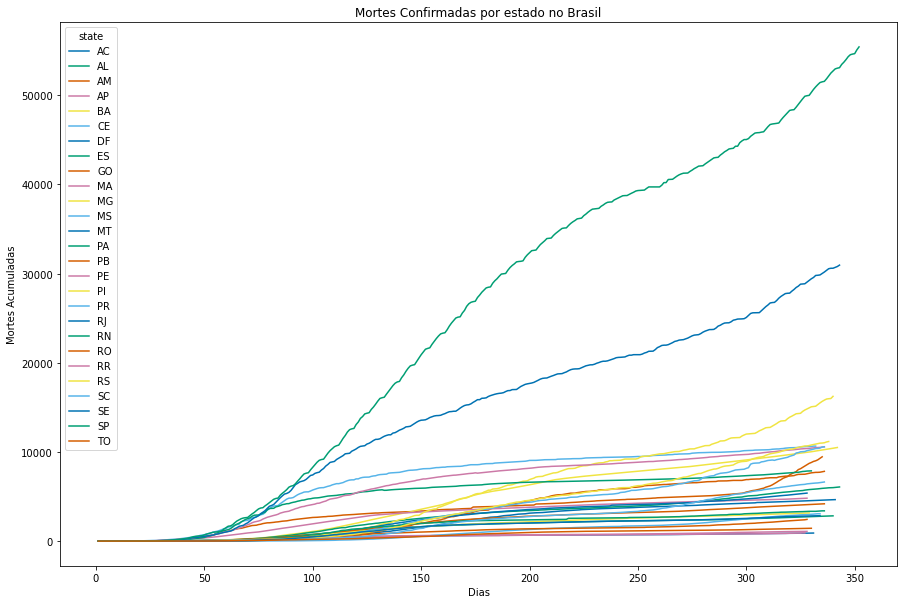

In [4]:
scale_y = 1e3
# ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
todos = df.pivot(index="order_for_place", columns='state', values='last_available_deaths')
todos.plot(figsize=(15,10))#.yaxis.set_major_formatter(ticks_y)
plt.xlabel('Dias')
plt.ylabel("Mortes Acumuladas")
plt.title('Mortes Confirmadas por estado no Brasil')
plt.show()

In [5]:
#Retorna dados referentes à sigla inserida (sigla do estado ou 'br' para Brasil)
def dadosEstado(sigla):
    if sigla.upper() == "BR":
        result = df.groupby("date").sum()
        result['date'] = result.index
        result['order_for_place'] = range(1,len(result.index)+1)
    else:
        result = df[df["state"]==(sigla.upper())]
    return result

#Plota os casos confirmados referentes à sigla inserida
def plotCasos(sigla):
    est = dadosEstado(sigla)
    scale_y = 1e3
    ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_y))
    est.plot(x="order_for_place", y="last_available_confirmed", figsize=(10,8), legend=False).yaxis.set_major_formatter(ticks_y)
    first_data = np.array(est["date"][0:1])[0]
    plt.title('Casos Confirmados em ' + sigla.upper())
    plt.xlabel('Dias a partir da data: ' + first_data)
    plt.ylabel("Casos Acumulados (mil)")
    
#Plota as mortes confirmadas referentes à sigla inserida
def plotMortes(sigla):
    est = dadosEstado(sigla)
    est.plot(x="order_for_place", y="last_available_deaths", figsize=(10,8), legend=False);
    first_data = np.array(est["date"][0:1])[0]
    plt.title('Mortes Confirmadas em ' + sigla.upper())
    plt.xlabel('Dias a partir da data: ' + first_data)
    plt.ylabel("Mortes Acumuladas")

#Plota o gráfico de Mortes~Casos referentes à sigla inserida (Talvez esse gráfico não tenha muita utilidade na nossa análise)
def plotMorteCasos(sigla):
    dados = dadosEstado(sigla)
    dados.plot(x="last_available_confirmed", y="last_available_deaths", figsize=(10,8), legend = False)
    plt.title('Dados de: ' + sigla.upper())
    plt.xlabel('Casos')
    plt.ylabel("Mortes")
#     plt.ylim(0,2000000)
    plt.show()

#Plota as mortes e os casos confirmados referentes à sigla inserida num mesmo gráfico
def plotDados(sigla):
    dados = dadosEstado(sigla)
    plt.figure(figsize=(10,8))
    plt.plot(dados["order_for_place"], dados["last_available_confirmed"],  label = "Casos Confirmados")
    plt.plot(dados["order_for_place"],  dados["last_available_deaths"], label = "Mortes Confirmados")
    first_data = np.array(dados["date"][0:1])[0]
    plt.title('Dados de: ' + sigla.upper())
    plt.xlabel('Dias a partir da data: ' + first_data)
    plt.legend()
    plt.show()

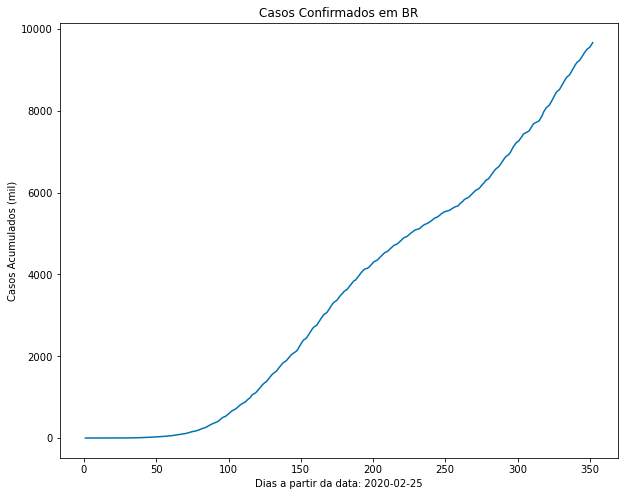

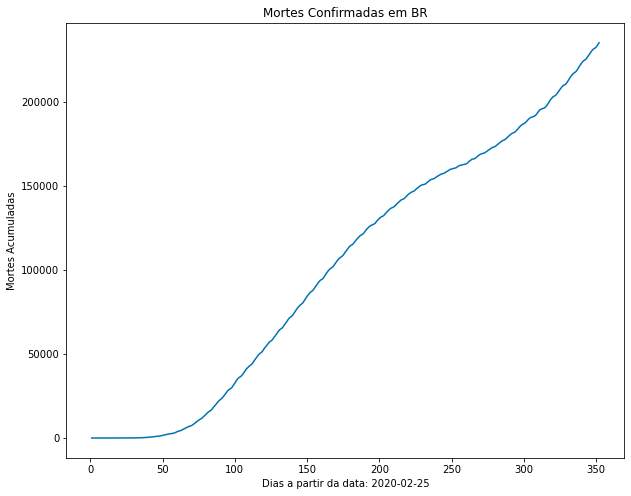

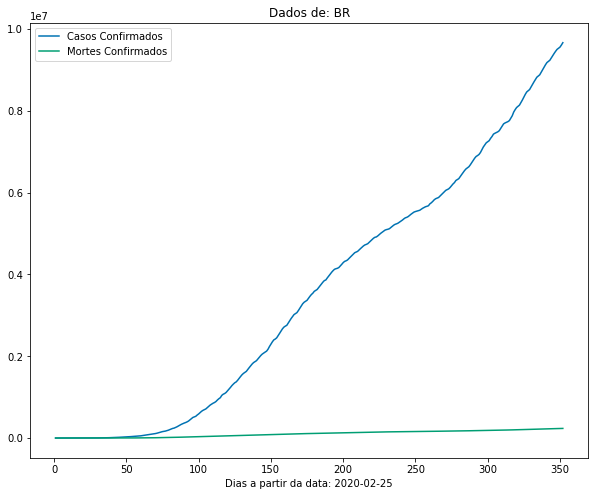

In [6]:
plotCasos('br')
plotMortes('br')
plotDados('br')